# Projekt - Przewidzenie ceny nieruchomości w Dubaju

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("properties_data.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,1.0,2,Medium,1,...,1,0,1.0,0,0,0,0,1.0,NaN,1
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,2.0,2,Medium,1,...,0,0,0.0,0,0,0,0,1.0,NaN,1
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,3.0,5,Medium,0,...,0,1,0.0,0,0,0,1,1.0,1.0,1
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,NaN,3,Low,0,...,1,1,1.0,0,0,0,0,0.0,0.0,0
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,0.0,1,Medium,1,...,0,1,0.0,0,0,0,1,1.0,1.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 24 columns):
id                     1905 non-null int64
neighborhood           1905 non-null object
latitude               1890 non-null float64
longitude              1905 non-null float64
price                  1905 non-null int64
size_in_sqft           1905 non-null int64
no_of_bedrooms         1811 non-null float64
no_of_bathrooms        1905 non-null int64
quality                1905 non-null object
furnished              1905 non-null int64
balcony                1905 non-null int64
barbecue_area          1905 non-null int64
central_ac             1905 non-null int64
childrens_play_area    1905 non-null int64
concierge              1905 non-null int64
covered_parking        1905 non-null int64
pets_allowed           1864 non-null float64
private_garden         1905 non-null int64
private_gym            1905 non-null int64
private_pool           1905 non-null int64
security               

In [6]:
df.describe()

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,furnished,balcony,barbecue_area,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
count,1.905000e+03,1890.000000,1905.000000,1.905000e+03,1905.000000,1811.000000,1905.000000,1905.000000,1905.000000,1905.000000,...,1905.00000,1905.000000,1864.000000,1905.000000,1905.000000,1905.000000,1905.000000,1885.000000,1754.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1.796797,2.512861,0.358530,0.719685,0.141207,...,0.35643,0.618373,0.297747,0.016798,0.007874,0.043045,0.352231,0.661008,0.206385,0.343307
std,1.925252e+05,0.062632,0.068794,2.913200e+06,891.487639,0.955132,1.063117,0.479695,0.449271,0.348327,...,0.47907,0.485913,0.457390,0.128547,0.088409,0.203011,0.477791,0.473493,0.404826,0.474938
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.560167e+06,25.072832,55.145389,8.900000e+05,840.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.670328e+06,25.188114,55.271797,2.200000e+06,1703.000000,2.000000,3.000000,1.000000,1.000000,0.000000,...,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,5.000000,6.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.drop("id", axis=1, inplace=True)

In [8]:
df.head()

,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,balcony,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
0,Palm Jumeirah,25.113208,55.138932,2700000,1079,1.0,2,Medium,1,1,...,1,0,1.0,0,0,0,0,1.0,NaN,1
1,Palm Jumeirah,25.106809,55.151201,2850000,1582,2.0,2,Medium,1,1,...,0,0,0.0,0,0,0,0,1.0,NaN,1
2,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,3.0,5,Medium,0,1,...,0,1,0.0,0,0,0,1,1.0,1.0,1
3,Culture Village,25.227295,55.341761,2850000,2020,NaN,3,Low,0,1,...,1,1,1.0,0,0,0,0,0.0,0.0,0
4,Palm Jumeirah,25.114275,55.139764,1729200,507,0.0,1,Medium,1,0,...,0,1,0.0,0,0,0,1,1.0,1.0,1


## Zmienne kategoryczne

In [9]:
lista=["neighborhood", "quality","no_of_bedrooms","no_of_bathrooms"]

In [10]:
for x in lista:
    print("Rozkład zmiennej", x, ":",'\n',df[x].value_counts(), '\n')

Rozkład zmiennej neighborhood : 
 Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
Mohammed Bin Rashid City              31
DIFC                                  31
Dubai Harbour                         30
Greens                                30
Town Square                           27
Motor City                            27
Dubai Sports City                     25
Al Furjan                             23
DAMAC Hills                           21
Old Town                              17
Meydan                                17
City Walk                             14
Umm Suqeim             

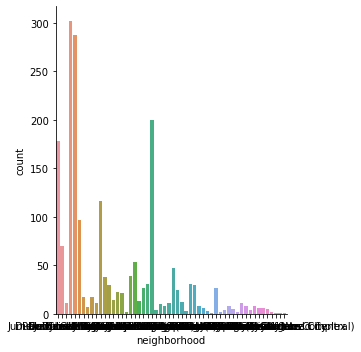

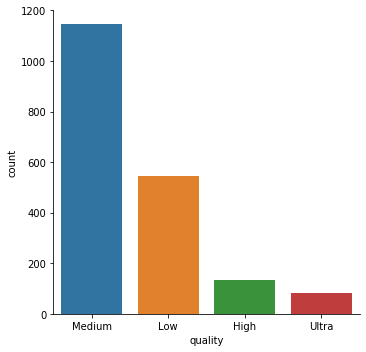

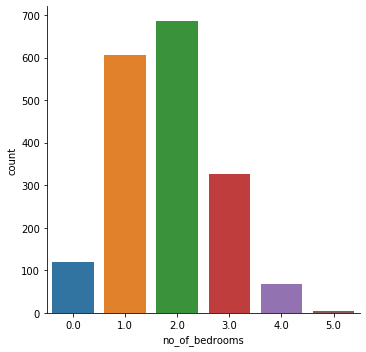

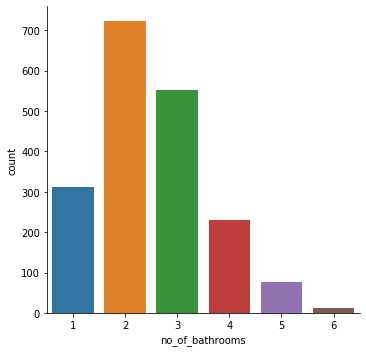

In [11]:
for zmienna in lista:
    sns.catplot(x=zmienna, kind="count", data=df)

In [12]:
popularne_dzielnice=["Downtown Dubai", "Dubai Marina", "Jumeirah Village Circle", "Palm Jumeirah", "Jumeirah Beach Residence", "Business Bay","Jumeirah Lake Towers", "Dubai Hills Estate", "The Views", "Jumeirah","Dubai Creek Harbour (The Lagoons)","DIFC","Mohammed Bin Rashid City","Dubai Harbour","Greens"]

In [13]:
df["neighborhood"]=df["neighborhood"].apply(lambda x: x if x in popularne_dzielnice else "Others")

In [14]:
df["quality"]=df["quality"].apply(lambda x : x if x in ["Medium", "Low"] else "High&Ultra")

In [15]:
df["neighborhood"].value_counts()

Others                               355
Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
DIFC                                  31
Mohammed Bin Rashid City              31
Dubai Harbour                         30
Greens                                30
Name: neighborhood, dtype: int64

In [16]:
df["quality"].value_counts()

Medium        1146
Low            544
High&Ultra     215
Name: quality, dtype: int64

In [17]:
df["no_of_bathrooms"].value_counts()

2    723
3    553
1    311
4    230
5     77
6     11
Name: no_of_bathrooms, dtype: int64

In [18]:
df["no_of_bathrooms"]=df["no_of_bathrooms"].apply(lambda x: x if x<5 else "5lub6")

In [19]:
df["no_of_bathrooms"].value_counts()

2        723
3        553
1        311
4        230
5lub6     88
Name: no_of_bathrooms, dtype: int64

In [20]:
df.drop("neighborhood", axis=1, inplace=True)

In [21]:
corr=df.corr()

In [22]:
matrix = np.triu(df.corr())

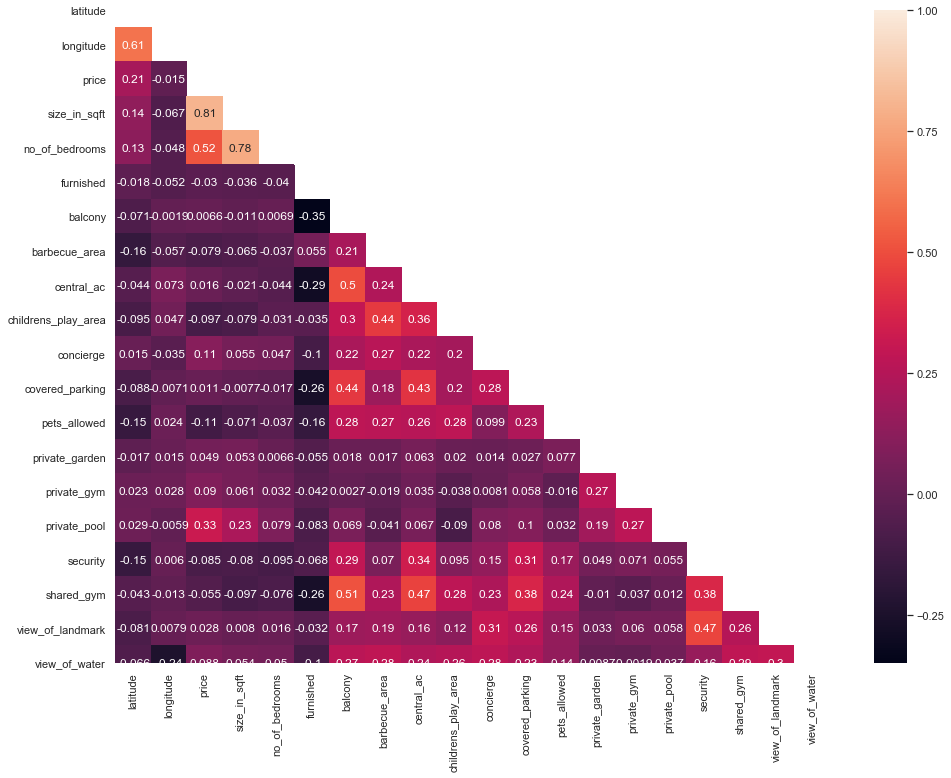

In [23]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(16,12))

sns.heatmap(corr, mask=matrix, annot=True)

## Podział zbioru na treningowy i testowy 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=df.drop(["price"], axis=1)

In [26]:
y=df["price"]

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=123)

In [28]:
X_train.head()

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
1755,25.080143,55.152381,398,0.0,1,Medium,0,0,0,1,...,1,1,0.0,0,0,0,1,1.0,0.0,1
1505,25.090200,55.175145,1441,2.0,2,Medium,0,1,0,1,...,1,1,0.0,0,0,0,1,1.0,0.0,0
863,25.204135,55.344345,1592,3.0,4,Medium,0,1,0,1,...,0,1,0.0,0,0,0,0,1.0,0.0,1
1640,25.013504,55.254337,1619,2.0,2,Low,0,0,0,1,...,0,0,1.0,0,0,0,0,0.0,0.0,0
141,25.194935,55.282665,2310,3.0,4,Medium,1,1,0,0,...,0,0,0.0,0,0,0,0,1.0,0.0,1


## Analiza wartości odstających

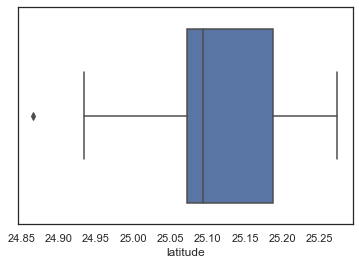

In [29]:
sns.boxplot(X_train["latitude"])

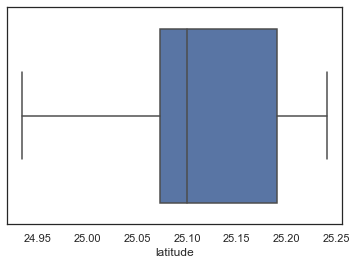

In [30]:
sns.boxplot(X_test["latitude"])

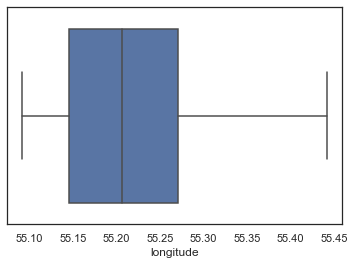

In [31]:
sns.boxplot(X_train["longitude"])

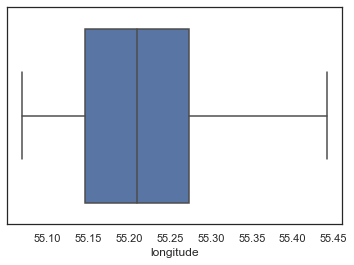

In [32]:
sns.boxplot(X_test["longitude"])

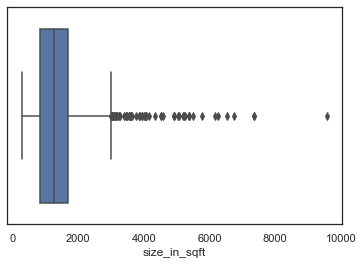

In [33]:
sns.boxplot(X_train["size_in_sqft"])

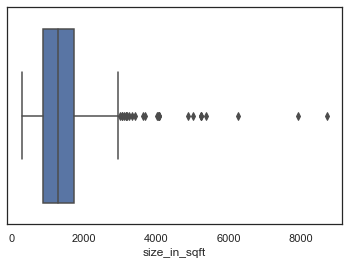

In [34]:
sns.boxplot(X_test["size_in_sqft"])

## Winsoryzacja

In [35]:
zmienne=["latitude", "longitude", "size_in_sqft"]

In [36]:
for i in zmienne:
    min_threshold, max_threshold= X_train[i].quantile([0.001, 0.999])
    index_max_train=X_train[X_train[i]>max_threshold].index
    index_min_train=X_train[X_train[i]<min_threshold].index
    index_max_test=X_test[X_test[i]>max_threshold].index
    index_min_test=X_test[X_test[i]<min_threshold].index
    X_train.loc[index_max_train, i]=max_threshold
    X_train.loc[index_min_train, i]=min_threshold
    X_test.loc[index_max_test, i]=max_threshold
    X_test.loc[index_min_test, i]=min_threshold
    

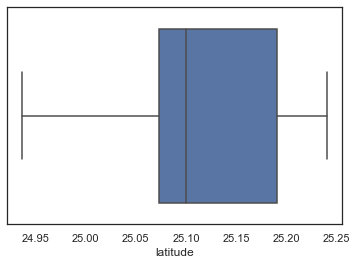

In [37]:
sns.boxplot(X_test["latitude"])

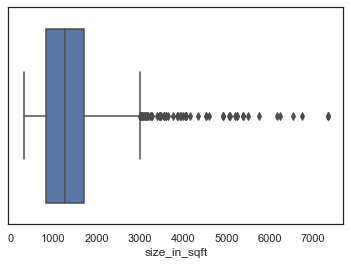

In [38]:
sns.boxplot(X_train["size_in_sqft"])

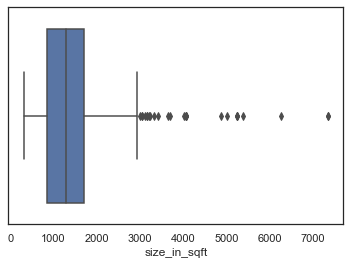

In [39]:
sns.boxplot(X_test["size_in_sqft"])

## Transformacja

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train["size_in_sqft"].skew()

2.5828556644338834

In [42]:
X_train["size_in_sqft"]=np.log10(X_train["size_in_sqft"])

In [43]:
X_test["size_in_sqft"]=np.log10(X_test["size_in_sqft"])

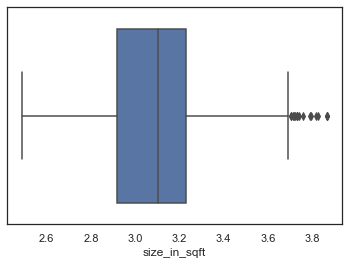

In [44]:
sns.boxplot(X_train["size_in_sqft"])

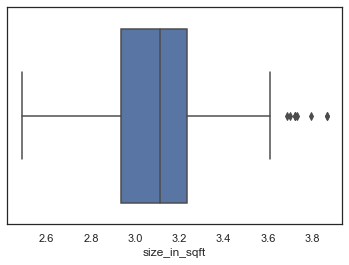

In [45]:
sns.boxplot(X_test["size_in_sqft"])

## Braki danych 

In [46]:
X_train.isnull().sum()

latitude                13
longitude                0
size_in_sqft             0
no_of_bedrooms          69
no_of_bathrooms          0
quality                  0
furnished                0
balcony                  0
barbecue_area            0
central_ac               0
childrens_play_area      0
concierge                0
covered_parking          0
pets_allowed            27
private_garden           0
private_gym              0
private_pool             0
security                 0
shared_gym              14
view_of_landmark       109
view_of_water            0
dtype: int64

In [47]:
X_test.isnull().sum()

latitude                2
longitude               0
size_in_sqft            0
no_of_bedrooms         25
no_of_bathrooms         0
quality                 0
furnished               0
balcony                 0
barbecue_area           0
central_ac              0
childrens_play_area     0
concierge               0
covered_parking         0
pets_allowed           14
private_garden          0
private_gym             0
private_pool            0
security                0
shared_gym              6
view_of_landmark       42
view_of_water           0
dtype: int64

In [48]:
# uzupełnianie zmiennej latitude

In [49]:
X_train['latitude'].skew()

0.30013093733483265

In [50]:
X_train['latitude'].fillna(X_train['latitude'].mean(), inplace=True)

In [51]:
X_test['latitude'].fillna(X_train['latitude'].mean(), inplace=True)

In [52]:
# uzupełnianie zmiennej pets_allowed

In [53]:
X_train["pets_allowed"].value_counts()

0.0    921
1.0    385
Name: pets_allowed, dtype: int64

In [54]:
X_train["pets_allowed"].fillna(0.0, inplace=True)

In [55]:
X_test["pets_allowed"].fillna(0.0, inplace=True)

In [56]:
# uzupełnianie zmiennej shared_gym

In [57]:
X_train["shared_gym"].value_counts()

1.0    871
0.0    448
Name: shared_gym, dtype: int64

In [58]:
X_train["shared_gym"].fillna(1.0, inplace=True)

In [59]:
X_test["shared_gym"].fillna(1.0, inplace=True)

In [60]:
#zmienna view_of_landmark

In [61]:
X_train["view_of_landmark"].value_counts()

0.0    971
1.0    253
Name: view_of_landmark, dtype: int64

In [62]:
X_train.groupby("view_of_landmark").agg({"security":["mean"]})

,security
,mean
view_of_landmark,
0.0,0.233780
1.0,0.774704


In [63]:
def braki(x):
    if x["security"]==1:
        return 1.0
    else:
        return 0.0

In [64]:
X_train.loc[:, "view_of_landmark"]=np.where(X_train["view_of_landmark"].isna(),X_train.apply(braki, axis=1), X_train["view_of_landmark"])

In [65]:
X_test.loc[:, "view_of_landmark"]=np.where(X_test["view_of_landmark"].isna(),X_test.apply(braki, axis=1), X_test["view_of_landmark"])

In [66]:
X_train.drop("no_of_bedrooms", axis=1, inplace=True)

In [67]:
X_test.drop("no_of_bedrooms", axis=1, inplace=True)

In [68]:
X_train.isnull().sum()

latitude               0
longitude              0
size_in_sqft           0
no_of_bathrooms        0
quality                0
furnished              0
balcony                0
barbecue_area          0
central_ac             0
childrens_play_area    0
concierge              0
covered_parking        0
pets_allowed           0
private_garden         0
private_gym            0
private_pool           0
security               0
shared_gym             0
view_of_landmark       0
view_of_water          0
dtype: int64

In [69]:
X_test.isnull().sum()

latitude               0
longitude              0
size_in_sqft           0
no_of_bathrooms        0
quality                0
furnished              0
balcony                0
barbecue_area          0
central_ac             0
childrens_play_area    0
concierge              0
covered_parking        0
pets_allowed           0
private_garden         0
private_gym            0
private_pool           0
security               0
shared_gym             0
view_of_landmark       0
view_of_water          0
dtype: int64

## One Hot Encoding

In [70]:
to_dummify=["quality", "no_of_bathrooms"]

In [71]:
## zbiór testowy

In [72]:
for x in to_dummify:
    dummy_test=pd.get_dummies(X_test[x], prefix=x)
    mask=str(X_train[x].value_counts().index[0])
    dummy_test.drop(x+"_"+mask, inplace=True, axis=1)
    X_test=pd.concat([X_test, dummy_test], axis=1)
    X_test.drop(x,inplace=True, axis=1)
    

In [73]:
for x in to_dummify:
    dummy_train=pd.get_dummies(X_train[x], prefix=x)
    mask=str(X_train[x].value_counts().index[0])
    dummy_train.drop(x+"_"+mask, inplace=True, axis=1)
    X_train=pd.concat([X_train, dummy_train], axis=1)
    X_train.drop(x,inplace=True, axis=1)

## Standaryzacja zmiennych 

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scale=StandardScaler()

In [76]:
zmienne_do_standaryzacji=["latitude","longitude","size_in_sqft"]

In [77]:
scale.fit(X_train[zmienne_do_standaryzacji])

StandardScaler()

In [78]:
# X_train

In [79]:
transformed=scale.transform(X_train[zmienne_do_standaryzacji])

In [80]:
transformed

array([[-0.57007887, -0.87024521, -2.12525153],
       [-0.40715711, -0.53515839,  0.31124951],
       [ 1.43857131,  1.95547108,  0.49996306],
       ...,
       [-1.29962233,  0.14752727, -1.90538141],
       [ 1.29440896,  0.84110575, -0.30449493],
       [ 1.39108958,  0.86389236,  1.74783795]])

In [81]:
X_train_scaled=pd.DataFrame(transformed)

In [82]:
X_train_scaled.head()

,0,1,2
0,-0.570079,-0.870245,-2.125252
1,-0.407157,-0.535158,0.311250
2,1.438571,1.955471,0.499963
3,-1.649620,0.630550,0.531810
4,1.289533,1.047539,1.204902


In [83]:
X_train_scaled.rename({0:"latitude",1:"longitude",2:"size_in_sqft"}, axis=1, inplace=True)

In [84]:
X_train_scaled.head()

,latitude,longitude,size_in_sqft
0,-0.570079,-0.870245,-2.125252
1,-0.407157,-0.535158,0.311250
2,1.438571,1.955471,0.499963
3,-1.649620,0.630550,0.531810
4,1.289533,1.047539,1.204902


In [85]:
X_train_scaled.describe().round(2)

,latitude,longitude,size_in_sqft
count,1333.00,1333.00,1333.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.89,-1.50,-2.61
25%,-0.69,-0.97,-0.74
50%,-0.33,-0.07,0.07
75%,1.16,0.88,0.62
max,2.03,3.39,3.40


In [86]:
X_train_new=X_train.drop(zmienne_do_standaryzacji, axis=1).reset_index(drop=True)

In [87]:
X_train_new.head()

,furnished,balcony,barbecue_area,central_ac,childrens_play_area,concierge,covered_parking,pets_allowed,private_garden,private_gym,...,security,shared_gym,view_of_landmark,view_of_water,quality_High&Ultra,quality_Low,no_of_bathrooms_1,no_of_bathrooms_3,no_of_bathrooms_4,no_of_bathrooms_5lub6
0,0,0,0,1,0,1,1,0.0,0,0,...,1,1.0,0.0,1,0,0,1,0,0,0
1,0,1,0,1,0,1,1,0.0,0,0,...,1,1.0,0.0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,1,0.0,0,0,...,0,1.0,0.0,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,1.0,0,0,...,0,0.0,0.0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0.0,0,0,...,0,1.0,0.0,1,0,0,0,0,1,0


In [88]:
X_train=pd.concat([X_train_new, X_train_scaled], axis=1)

In [89]:
X_train.head()

,furnished,balcony,barbecue_area,central_ac,childrens_play_area,concierge,covered_parking,pets_allowed,private_garden,private_gym,...,view_of_water,quality_High&Ultra,quality_Low,no_of_bathrooms_1,no_of_bathrooms_3,no_of_bathrooms_4,no_of_bathrooms_5lub6,latitude,longitude,size_in_sqft
0,0,0,0,1,0,1,1,0.0,0,0,...,1,0,0,1,0,0,0,-0.570079,-0.870245,-2.125252
1,0,1,0,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,-0.407157,-0.535158,0.311250
2,0,1,0,1,1,0,1,0.0,0,0,...,1,0,0,0,0,1,0,1.438571,1.955471,0.499963
3,0,0,0,1,1,0,0,1.0,0,0,...,0,0,1,0,0,0,0,-1.649620,0.630550,0.531810
4,1,1,0,0,0,0,0,0.0,0,0,...,1,0,0,0,0,1,0,1.289533,1.047539,1.204902


In [90]:
## X_test

In [91]:
zmienne_do_standaryzacji=["latitude","longitude","size_in_sqft"]

In [92]:
X_test_scaled=pd.DataFrame(scale.transform(X_test[zmienne_do_standaryzacji]))

In [93]:
X_test_scaled.rename({0:"latitude",1:"longitude",2:"size_in_sqft"}, axis=1, inplace=True)

In [94]:
X_test_new=X_test.drop(zmienne_do_standaryzacji, axis=1).reset_index(drop=True)

In [95]:
X_test=pd.concat([X_test_new,X_test_scaled], axis=1)

In [96]:
X_test.head()

,furnished,balcony,barbecue_area,central_ac,childrens_play_area,concierge,covered_parking,pets_allowed,private_garden,private_gym,...,view_of_water,quality_High&Ultra,quality_Low,no_of_bathrooms_1,no_of_bathrooms_3,no_of_bathrooms_4,no_of_bathrooms_5lub6,latitude,longitude,size_in_sqft
0,0,0,0,1,0,0,1,0.0,1,1,...,0,0,0,0,0,0,1,1.314707,0.892405,2.760668
1,1,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,-0.119059,0.491976,0.378381
2,0,1,0,0,0,0,1,0.0,0,0,...,0,0,0,0,1,0,0,-0.710029,-1.220611,0.777206
3,0,1,0,1,0,0,1,1.0,1,1,...,1,1,0,0,1,0,0,-0.988148,-0.118905,0.040463
4,0,1,0,1,0,0,1,0.0,0,0,...,1,0,0,0,0,1,0,-0.454930,-0.970444,0.674820


### Wybór zmiennych do modelowania

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [98]:
model=LinearRegression()

In [99]:
rfe=RFE(model, n_features_to_select=20)

In [100]:
rfe_fit=rfe.fit(X_train, y_train)

In [101]:
rfe_fit.support_

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True])

In [102]:
features=X_train.columns[rfe_fit.support_]

In [103]:
features

Index(['balcony', 'barbecue_area', 'central_ac', 'childrens_play_area',
       'concierge', 'pets_allowed', 'private_garden', 'private_gym',
       'private_pool', 'security', 'shared_gym', 'view_of_landmark',
       'view_of_water', 'quality_High&Ultra', 'no_of_bathrooms_1',
       'no_of_bathrooms_3', 'no_of_bathrooms_4', 'no_of_bathrooms_5lub6',
       'latitude', 'size_in_sqft'],
      dtype='object')

In [104]:
X_train=X_train[features]

In [105]:
X_train.head()

,balcony,barbecue_area,central_ac,childrens_play_area,concierge,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water,quality_High&Ultra,no_of_bathrooms_1,no_of_bathrooms_3,no_of_bathrooms_4,no_of_bathrooms_5lub6,latitude,size_in_sqft
0,0,0,1,0,1,0.0,0,0,0,1,1.0,0.0,1,0,1,0,0,0,-0.570079,-2.125252
1,1,0,1,0,1,0.0,0,0,0,1,1.0,0.0,0,0,0,0,0,0,-0.407157,0.311250
2,1,0,1,1,0,0.0,0,0,0,0,1.0,0.0,1,0,0,0,1,0,1.438571,0.499963
3,0,0,1,1,0,1.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,-1.649620,0.531810
4,1,0,0,0,0,0.0,0,0,0,0,1.0,0.0,1,0,0,0,1,0,1.289533,1.204902


In [106]:
X_test=X_test[features]

# Modelowanie

### regresja liniowa

In [107]:
reg=LinearRegression()

In [108]:
reg.fit(X_train, y_train)

LinearRegression()

In [109]:
from sklearn import metrics

In [110]:
y_pred_regresja=reg.predict(X_test)

In [111]:
MAE_linear=metrics.mean_absolute_error(y_test, y_pred_regresja)

In [112]:
MSE_linear=metrics.mean_squared_error(y_test, y_pred_regresja)

In [113]:
RMSE_linear=np.sqrt(MSE_linear)

In [114]:
R2=metrics.r2_score(y_test, y_pred_regresja)

In [115]:
mean=np.mean(y_test)

In [116]:
results_regresja=pd.DataFrame(data=[["Linear Regression",MAE_linear,MSE_linear,RMSE_linear, R2,mean]], columns=["Model", "MAE", "MSE","RMSE", "R^2", "Mean"])

In [117]:
results_regresja

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1.130571e+06,4.859509e+12,2.204429e+06,0.460658,2.144683e+06


### regresja liniowa z regularyzacją grzbietową(ridge) 

In [118]:
from sklearn.linear_model import Ridge

In [119]:
ridge=Ridge()

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
parameters = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 'solver':['svd', 'cholesky', 'lsqr']
             }

In [122]:
grid = GridSearchCV(estimator=ridge, param_grid = parameters, cv = 5, n_jobs=-1, scoring='neg_mean_absolute_error')

In [123]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['svd', 'cholesky', 'lsqr']},
             scoring='neg_mean_absolute_error')

In [124]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -1005743.854101 using {'alpha': 100, 'solver': 'lsqr'}


In [125]:
ridge = grid.best_estimator_

In [126]:
ridge

Ridge(alpha=100, solver='lsqr')

In [127]:
ridge.fit(X_train, y_train)

Ridge(alpha=100, solver='lsqr')

In [128]:
y_pred = ridge.predict(X_test)

In [129]:
from sklearn import metrics
MAE_linear_ridge = metrics.mean_absolute_error(y_test, y_pred)
MSE_linear_ridge = metrics.mean_squared_error(y_test, y_pred)
RMSE_linear_ridge = np.sqrt(MSE_linear_ridge)
R2_ridge = metrics.r2_score(y_test, y_pred)
mean_ridge = np.mean(y_test)

In [130]:
results_ridge = pd.DataFrame(data=[["Ridge regression", MAE_linear_ridge, MSE_linear_ridge, RMSE_linear_ridge, R2_ridge, mean_ridge]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_ridge.round(3)

,Model,MAE,MSE,RMSE,R^2,Mean
0,Ridge regression,1067263.891,4.710027e+12,2170259.587,0.477,2144683.29


In [131]:
pd.concat([results_regresja, results_ridge])

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1.130571e+06,4.859509e+12,2.204429e+06,0.460658,2.144683e+06
0,Ridge regression,1.067264e+06,4.710027e+12,2.170260e+06,0.477249,2.144683e+06


## drzewo decyzyjne 

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dt = DecisionTreeRegressor(random_state=123)

In [134]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [135]:
y_pred = dt.predict(X_test)

In [136]:
from sklearn import metrics
MAE_dt = metrics.mean_absolute_error(y_test, y_pred)
MSE_dt = metrics.mean_squared_error(y_test, y_pred)
RMSE_dt = np.sqrt(MSE_dt)
R2 = metrics.r2_score(y_test, y_pred)
mean = np.mean(y_test)

In [137]:
results_drzewo = pd.DataFrame(data=[["Drzewo regresyjne", MAE_dt, MSE_dt, RMSE_dt, R2, mean]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_drzewo

,Model,MAE,MSE,RMSE,R^2,Mean
0,Drzewo regresyjne,639619.268357,1.597625e+12,1.263972e+06,0.822685,2.144683e+06


## drzewo decyzyjne z optymalizacją

In [138]:
dt = DecisionTreeRegressor()

In [139]:
params = {
    'max_depth': np.arange(2,20),
    'min_samples_leaf': np.arange(5,101),
    'min_samples_split': np.arange(2,7),
    'max_features': np.arange(5,18)
}

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=params, 
                           cv=5, n_jobs=-1, n_iter=500)

In [142]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                                        'min_samples_leaf': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100]),
                                        'm

In [143]:
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.727340 using {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 9, 'max_depth': 13}


In [144]:
dt = DecisionTreeRegressor(random_state=22, min_samples_split = 5, min_samples_leaf = 5, max_features = 12, max_depth = 8)

In [145]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=12, min_samples_leaf=5,
                      min_samples_split=5, random_state=22)

In [146]:
y_pred = dt.predict(X_test)

In [147]:
from sklearn import metrics
MAE_dt = metrics.mean_absolute_error(y_test, y_pred)
MSE_dt = metrics.mean_squared_error(y_test, y_pred)
RMSE_dt = np.sqrt(MSE_dt)
R2 = metrics.r2_score(y_test, y_pred)
mean = np.mean(y_test)

In [148]:
results_drzewo_opt = pd.DataFrame(data=[["Drzewo regresyjne opt", MAE_dt, MSE_dt, RMSE_dt, R2, mean]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_drzewo_opt.round(3)

,Model,MAE,MSE,RMSE,R^2,Mean
0,Drzewo regresyjne opt,650723.178,1.944075e+12,1394300.837,0.784,2144683.29


## las losowy bez optymalizacji

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
estimator = RandomForestRegressor(random_state = 2,criterion='mse')

In [151]:
estimator.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', random_state=2)

In [152]:
y_pred = estimator.predict(X_test)

In [153]:
MAE_trees = metrics.mean_absolute_error(y_test, y_pred)
MSE_trees = metrics.mean_squared_error(y_test, y_pred)
RMSE_trees = np.sqrt(MSE_trees)
R2 = metrics.r2_score(y_test, y_pred)
mean = np.mean(y_test)

In [154]:
results_df = pd.DataFrame(data=[["Random Forest", MAE_trees, MSE_trees, RMSE_trees, R2, mean]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_df.round(3)

,Model,MAE,MSE,RMSE,R^2,Mean
0,Random Forest,513059.16,9.696897e+11,984728.237,0.892,2144683.29


In [155]:
pd.concat([results_regresja, results_ridge,results_df])

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1.130571e+06,4.859509e+12,2.204429e+06,0.460658,2.144683e+06
0,Ridge regression,1.067264e+06,4.710027e+12,2.170260e+06,0.477249,2.144683e+06
0,Random Forest,5.130592e+05,9.696897e+11,9.847282e+05,0.892377,2.144683e+06


## las losowy z optymalizacją

In [156]:
bootstrap = [True, False]
n_estimators = np.arange(10,150,30)
max_depth = np.arange(3,15)
min_samples_leaf = np.arange(5,30)
min_samples_split = np.arange(5,30)
max_features = ['log2','sqrt', None]

In [157]:
from sklearn.model_selection import RandomizedSearchCV
estimator = RandomForestRegressor(random_state=2)
para_grids = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap }
random_search = RandomizedSearchCV(estimator=estimator, 
                           param_distributions=para_grids, 
                           cv=3, n_jobs=-1, n_iter=500, random_state=123)
random_search.fit(X_train, y_train)
best_param = random_search.best_estimator_
print(best_param)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=6, random_state=2)


In [158]:
trees = RandomForestRegressor(bootstrap=False, max_depth=10, max_features="sqrt",
                      min_samples_leaf=6, min_samples_split=5, n_estimators=70, random_state=None)

In [159]:
trees.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=6, min_samples_split=5, n_estimators=70)

In [160]:
y_pred = trees.predict(X_test)

In [161]:
MAE_trees = metrics.mean_absolute_error(y_test, y_pred)
MSE_trees = metrics.mean_squared_error(y_test, y_pred)
RMSE_trees = np.sqrt(MSE_trees)
R2 = metrics.r2_score(y_test, y_pred)
mean = np.mean(y_test)

In [162]:
results_las_losowy = pd.DataFrame(data=[["Random Forest Opt", MAE_trees, MSE_trees, RMSE_trees, R2, mean]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_las_losowy

,Model,MAE,MSE,RMSE,R^2,Mean
0,Random Forest Opt,700903.586011,2.772604e+12,1.665114e+06,0.692277,2.144683e+06


### XGBoost bez optymalizacji

In [163]:
from xgboost import XGBRegressor

In [164]:
xgb_reg = XGBRegressor()

In [165]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [166]:
y_pred = xgb_reg.predict(X_test)

In [167]:
MAE_xgb = metrics.mean_absolute_error(y_test, y_pred)
MSE_xgb = metrics.mean_squared_error(y_test, y_pred)
RMSE_xgb = np.sqrt(MSE_xgb)
R2 = metrics.r2_score(y_test, y_pred)
mean = np.mean(y_test)

In [168]:
results_Xgb = pd.DataFrame(data=[["XGBoost", MAE_xgb, MSE_xgb, RMSE_xgb, R2, mean]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_Xgb.round(3)

,Model,MAE,MSE,RMSE,R^2,Mean
0,XGBoost,496062.41,1.097927e+12,1047820.202,0.878,2144683.29


## XGBoost z optymalizacją

In [169]:
from xgboost import XGBRegressor

In [170]:
xgb_reg = XGBRegressor()
params = {
    'max_depth': np.arange(3,12,1),
    'min_child_weight': np.arange(5,15,1),
    'gamma': [i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

grid_xgb_reg=RandomizedSearchCV(xgb_reg,
                          params,
                          n_iter=100,
                          cv=5,
                          n_jobs=-1)
grid_xgb_reg.fit(X_train, y_train)
best_param = grid_xgb_reg.best_estimator_
print(best_param)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=8, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [171]:
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=8,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [172]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
y_pred = model_xgb.predict(X_test)

In [174]:
MAE_xgb = metrics.mean_absolute_error(y_test, y_pred)
MSE_xgb = metrics.mean_squared_error(y_test, y_pred)
RMSE_xgb = np.sqrt(MSE_xgb)
R2 = metrics.r2_score(y_test, y_pred)
mean = np.mean(y_test)

In [175]:
results_xgb_opt = pd.DataFrame(data=[["XGBoost Opt", MAE_xgb, MSE_xgb, RMSE_xgb, R2, mean]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2','Mean'])
results_xgb_opt.round(3)

,Model,MAE,MSE,RMSE,R^2,Mean
0,XGBoost Opt,598903.031,1.724288e+12,1313121.656,0.809,2144683.29


In [176]:
pd.concat([results_regresja,results_ridge,results_drzewo_opt,results_las_losowy,results_xgb_opt])

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1.130571e+06,4.859509e+12,2.204429e+06,0.460658,2.144683e+06
0,Ridge regression,1.067264e+06,4.710027e+12,2.170260e+06,0.477249,2.144683e+06
0,Drzewo regresyjne opt,6.507232e+05,1.944075e+12,1.394301e+06,0.784233,2.144683e+06
0,Random Forest Opt,7.009036e+05,2.772604e+12,1.665114e+06,0.692277,2.144683e+06
0,XGBoost Opt,5.989030e+05,1.724288e+12,1.313122e+06,0.808627,2.144683e+06
